In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('train_yaOffsB.csv')
df2 = pd.read_csv('test_pFkWwen.csv')

In [3]:
a = df['Number_Weeks_Used'].mean()
b = round(a,1)
b
a

28.62397004683313

In [4]:
df['Number_Weeks_Used'] =df['Number_Weeks_Used'].fillna(b)

In [5]:
df = df.drop(columns=['ID'])

In [6]:
Pesticide_Use_Category_dump = pd.get_dummies(df['Pesticide_Use_Category'],drop_first=True)
Season_dump = pd.get_dummies(df['Season'],drop_first=True)

In [7]:
df.drop(['Pesticide_Use_Category','Season'],axis=1,inplace=True)

In [8]:
df = pd.concat([Pesticide_Use_Category_dump,Season_dump,df],axis=1)

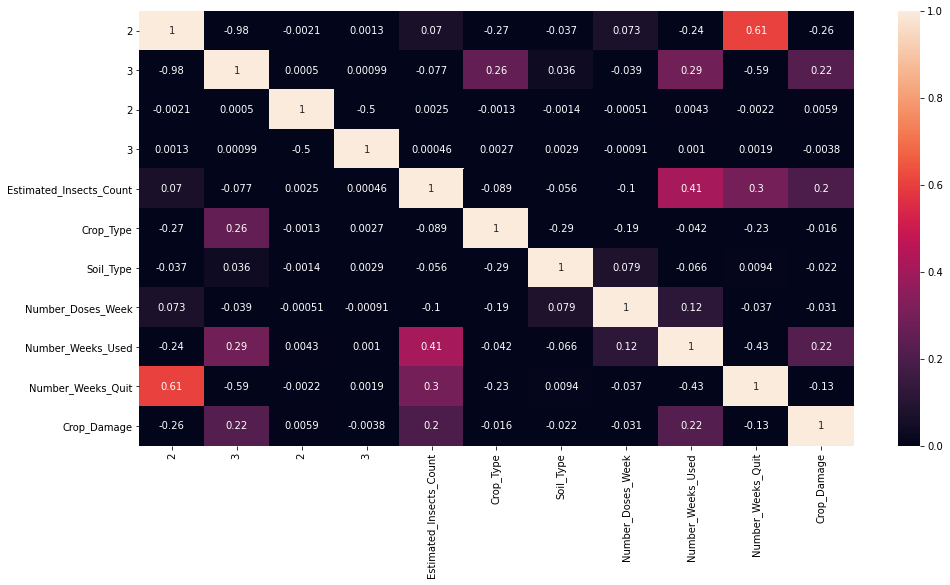

In [9]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),vmin=0,vmax=1,annot=True)

In [10]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(df.drop('Crop_Damage',axis=1))
scaled_array = ss.transform(df.drop('Crop_Damage',axis=1))

In [11]:
X = pd.DataFrame(scaled_array,columns=['Estimated_Insects_Count','Crop_Type','Soil_Type','Number_Doses_Week','Number_Weeks_Used','Number_Weeks_Quit',2,3,2,3])

In [12]:
y= df['Crop_Damage']

In [13]:
from sklearn.model_selection import train_test_split
X_train_full,X_test,y_train_full,y_test = train_test_split(X,y,random_state=42)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,random_state=42)

In [14]:
np.random.seed(42)
tf.random.set_seed(42)

In [15]:
model = keras.models.Sequential([
                                 keras.layers.Dense(10,activation='relu',input_dim=10),
                                 keras.layers.Dense(10,activation='relu'),
                                 keras.layers.Dense(3,activation='softmax')
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                110       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 33        
Total params: 253
Trainable params: 253
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer=keras.optimizers.SGD(lr=1e-3),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [18]:
model_history = model.fit(X_train,y_train,epochs=15,validation_data=(X_valid,y_valid),batch_size=25)

Epoch 1/15
2000/2000 [==============================] - 4s 2ms/step - loss: 0.7273 - accuracy: 0.7632 - val_loss: 0.5500 - val_accuracy: 0.8390
Epoch 2/15
2000/2000 [==============================] - 3s 2ms/step - loss: 0.5315 - accuracy: 0.8347 - val_loss: 0.5041 - val_accuracy: 0.8387
Epoch 3/15
2000/2000 [==============================] - 4s 2ms/step - loss: 0.5039 - accuracy: 0.8344 - val_loss: 0.4872 - val_accuracy: 0.8381
Epoch 4/15
2000/2000 [==============================] - 4s 2ms/step - loss: 0.4914 - accuracy: 0.8344 - val_loss: 0.4777 - val_accuracy: 0.8379
Epoch 5/15
2000/2000 [==============================] - 4s 2ms/step - loss: 0.4836 - accuracy: 0.8344 - val_loss: 0.4713 - val_accuracy: 0.8381
Epoch 6/15
2000/2000 [==============================] - 3s 2ms/step - loss: 0.4780 - accuracy: 0.8345 - val_loss: 0.4664 - val_accuracy: 0.8385
Epoch 7/15
2000/2000 [==============================] - 3s 2ms/step - loss: 0.4737 - accuracy: 0.8343 - val_loss: 0.4627 - val_accuracy:

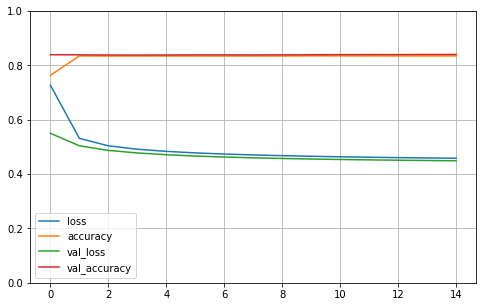

In [19]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [20]:
df2.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [21]:
id = df2['ID']

In [22]:
a = df2['Number_Weeks_Used'].mean()
b = round(a,1)
b
a

28.70509388396952

In [23]:
df2['Number_Weeks_Used'] =df2['Number_Weeks_Used'].fillna(b)

In [24]:
df2.drop(['ID'],axis=1,inplace=True)

In [25]:
Pesticide_Use_Category_dump_2 = pd.get_dummies(df2['Pesticide_Use_Category'],drop_first=True)
Season_dump_2 = pd.get_dummies(df2['Season'],drop_first=True)

In [26]:
df2.drop(['Pesticide_Use_Category','Season'],axis=1,inplace=True)

In [27]:
df2 = pd.concat([Pesticide_Use_Category_dump_2,Season_dump_2,df2],axis=1)

In [28]:
ss.fit(df2)
scaled_array1 = ss.transform(df2)

In [29]:
X1 = pd.DataFrame(scaled_array1,columns=[                        2,                         3,
                               2,                         3,
       'Estimated_Insects_Count',               'Crop_Type',
                     'Soil_Type',       'Number_Doses_Week',
             'Number_Weeks_Used',       'Number_Weeks_Quit'])

In [30]:
X1.head()

,2,3,2,3,Estimated_Insects_Count,Crop_Type,Soil_Type,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit
0,-1.593753,-0.612569,1.005071,-0.502659,-1.423343,1.575911,1.094183,-1.669821,-0.000389,-0.966832
1,-1.593753,-0.612569,1.005071,-0.502659,-1.161988,1.575911,1.094183,-1.669821,-2.435093,-0.966832
2,-1.593753,-0.612569,1.005071,-0.502659,-0.907696,1.575911,-0.913924,-1.669821,-2.435093,-0.966832
3,-1.593753,-0.612569,1.005071,-0.502659,-0.784082,1.575911,-0.913924,-1.669821,-2.435093,-0.966832
4,-1.593753,-0.612569,-0.994955,-0.502659,-0.715800,-0.634554,-0.913924,-1.669821,-2.435093,-0.966832


In [31]:
y_pred1 = model.predict(X1)

In [32]:
y_pred1

array([[0.8991305 , 0.09251412, 0.00835536],
       [0.90126336, 0.09588149, 0.00285508],
       [0.90068954, 0.0970549 , 0.00225553],
       ...,
       [0.82030684, 0.17832546, 0.00136767],
       [0.750246  , 0.23635106, 0.01340293],
       [0.56197405, 0.42740697, 0.01061899]], dtype=float32)

In [33]:
list(y_pred1[180]).index(max(y_pred1[180]))

0

In [34]:
l =[]
for i in range (0,59310):
  a = list(y_pred1[i]).index(max(y_pred1[i]))
  l.append(a)

In [35]:
l[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59310 entries, 0 to 59309
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   2                        59310 non-null  uint8  
 1   3                        59310 non-null  uint8  
 2   2                        59310 non-null  uint8  
 3   3                        59310 non-null  uint8  
 4   Estimated_Insects_Count  59310 non-null  int64  
 5   Crop_Type                59310 non-null  int64  
 6   Soil_Type                59310 non-null  int64  
 7   Number_Doses_Week        59310 non-null  int64  
 8   Number_Weeks_Used        59310 non-null  float64
 9   Number_Weeks_Quit        59310 non-null  int64  
dtypes: float64(1), int64(5), uint8(4)
memory usage: 2.9 MB


In [37]:
result = pd.DataFrame(l,id,columns=['Crop_Damage'])

In [38]:
result.head()

,Crop_Damage
ID,
F00000002,0
F00000007,0
F00000011,0
F00000013,0
F00000014,0


In [39]:
result.to_csv('Janatahack-02.csv')